In [146]:
import pandas as pd 
import os
import geopandas as gpd 
import matplotlib.pyplot as plt 
from shapely.geometry import Point 
from shapely.geometry import box
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib
import numpy as np

In [147]:
# Set the working directory
os.chdir('C:/Users/user/Documents/Unibo/Economics and Econometrics/Second Year/First Semester/Introduction to Python for Economists/Project')

nuclear_plants = pd.read_csv('nuclear_power_plants.csv') # data from "https://github.com/cristianst85/GeoNuclearData/blob/master/data/csv/denormalized/nuclear_power_plants.csv"
print(nuclear_plants.head())

# Consider only operational nuclear plants
operational_nuclear_plants = ["Operational"]
nuclear_plants = nuclear_plants[nuclear_plants['Status'].isin(operational_nuclear_plants)]
print(nuclear_plants.head())

   Id                  Name   Latitude  Longitude Country CountryCode  \
0   1                Ågesta  59.206000   18.08290  Sweden          SE   
1   2  Akademik Lomonosov-1  69.709579  170.30625  Russia          RU   
2   3  Akademik Lomonosov-2  69.709579  170.30625  Russia          RU   
3   4              Akhvaz-1        NaN        NaN    Iran          IR   
4   5              Akhvaz-2        NaN        NaN    Iran          IR   

        Status ReactorType        ReactorModel ConstructionStartAt  \
0     Shutdown        PHWR                 NaN          1957-12-01   
1  Operational         PWR  KLT-40S 'Floating'          2007-04-15   
2  Operational         PWR  KLT-40S 'Floating'          2007-04-15   
3      Planned         NaN                 NaN                 NaN   
4      Planned         NaN                 NaN                 NaN   

  OperationalFrom OperationalTo  Capacity              LastUpdatedAt  \
0      1964-05-01    1974-06-02       9.0  2015-05-24T04:51:37+03:00

In [148]:
# Filter rows where "OperationalFrom" is NA
na_rows = nuclear_plants[nuclear_plants["OperationalFrom"].isna()]

print("Observations with NA values in 'OperationalFrom':")
print(na_rows)
# Mochovce-3 is now under construction. Thus, we will ignore it 

Observations with NA values in 'OperationalFrom':
      Id                                    Name   Latitude   Longitude  \
119  121  CEFR (China Experimental Fast Reactor)  39.739000  116.030000   
356  358                              Kakrapar-3  21.236000   73.351000   
460  462                              Mochovce-3  48.261000   18.455000   
623  625                            Shin-Hanul-2  37.083889  129.391667   

         Country CountryCode       Status ReactorType ReactorModel  \
119        China          CN  Operational         FBR        BN-20   
356        India          IN  Operational        PHWR     PHWR-700   
460     Slovakia          SK  Operational         PWR   VVER V-213   
623  South Korea          KR  Operational         PWR     APR-1400   

    ConstructionStartAt OperationalFrom OperationalTo  Capacity  \
119          2000-05-10             NaN           NaN      20.0   
356          2010-11-22             NaN           NaN     630.0   
460          1987-01-2

In [149]:
eu_iso2_codes = [
    "AT", "BE", "BG", "HR", "CY",
    "CZ", "DK", "EE", "FI", "FR",
    "DE", "GR", "HU", "IE", "IT",
    "LV", "LT", "LU", "MT", "NL",
    "PL", "PT", "RO", "SK", "SI",
    "ES", "SE"
]

# Filter for EU countries
nuclear_plants = nuclear_plants[nuclear_plants['CountryCode'].isin(eu_iso2_codes)]

In [150]:
# Load the shapefile
sp_path = "NUTS_RG_01M_2021_4326_LEVL_3/NUTS_RG_01M_2021_4326_LEVL_3_repaired.shp"  
eu_map = gpd.read_file(sp_path)

# Define the bounding box for continental Europe
bounding_box = {
    "minx": -10,  # Western limit
    "maxx": 30,   # Eastern limit
    "miny": 35,   # Southern limit
    "maxy": 70    # Northern limit
}

In [151]:
print(eu_map)
print(eu_map.crs)# Filter rows where "CNTR_CODE" is "RO"
ro_observations = eu_map[eu_map["CNTR_CODE"] == "RO"]

# Display the result
print(ro_observations)

print(eu_map.columns)



     NUTS_ID  LEVL_CODE CNTR_CODE                            NAME_LATN  \
0      NO0B2          3        NO                             Svalbard   
1      NO0B1          3        NO                 Jan Mayen\r\n   \r\n   
2      HR064          3        HR          Krapinsko-zagorska upanija   
3      DE21A          3        DE                               Erding   
4      DE94E          3        DE                 Osnabrück, Landkreis   
...      ...        ...       ...                                  ...   
1509   UKM73          3        UK          East Lothian and Midlothian   
1510   UKM75          3        UK                   Edinburgh, City of   
1511   UKM76          3        UK                              Falkirk   
1512   UKM78          3        UK                         West Lothian   
1513   UKK24          3        UK  Bournemouth, Christchurch and Poole   

                                NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE  \
0                              

In [152]:
# Filter for EU countries
eu_map = eu_map[eu_map['CNTR_CODE'].isin(eu_iso2_codes)]


# Create a bounding box as a shapely object
bounding_polygon = box(bounding_box["minx"], bounding_box["miny"], bounding_box["maxx"], bounding_box["maxy"])

# Clip the map using the bounding box
eu_map = eu_map.clip(bounding_polygon)

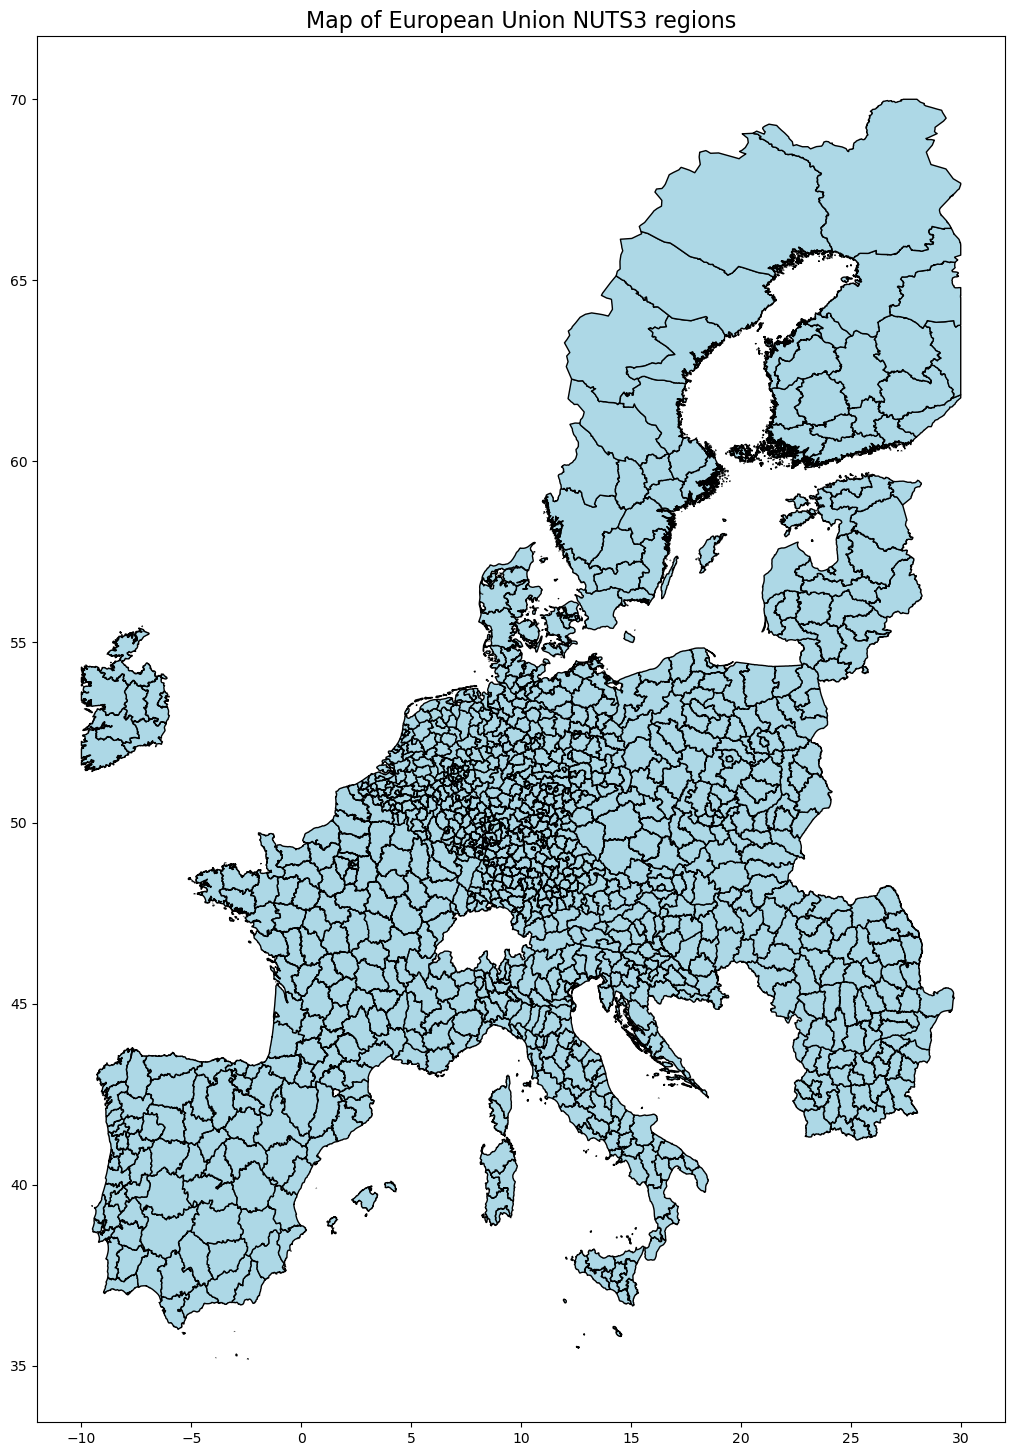

In [153]:
# Plot the map
fig, ax = plt.subplots(figsize=(18, 18))
eu_map.plot(ax=ax, color="lightblue", edgecolor="black")

# Add a title
ax.set_title("Map of European Union NUTS3 regions", fontsize=16)

# Show the plot
plt.show()

In [154]:
# Create a GeoDataFrame for nuclear plants
plants_gdf = gpd.GeoDataFrame(
    nuclear_plants, geometry=gpd.points_from_xy(nuclear_plants.Longitude, nuclear_plants.Latitude), crs="EPSG:4326"
)
print(plants_gdf.crs)

EPSG:4326


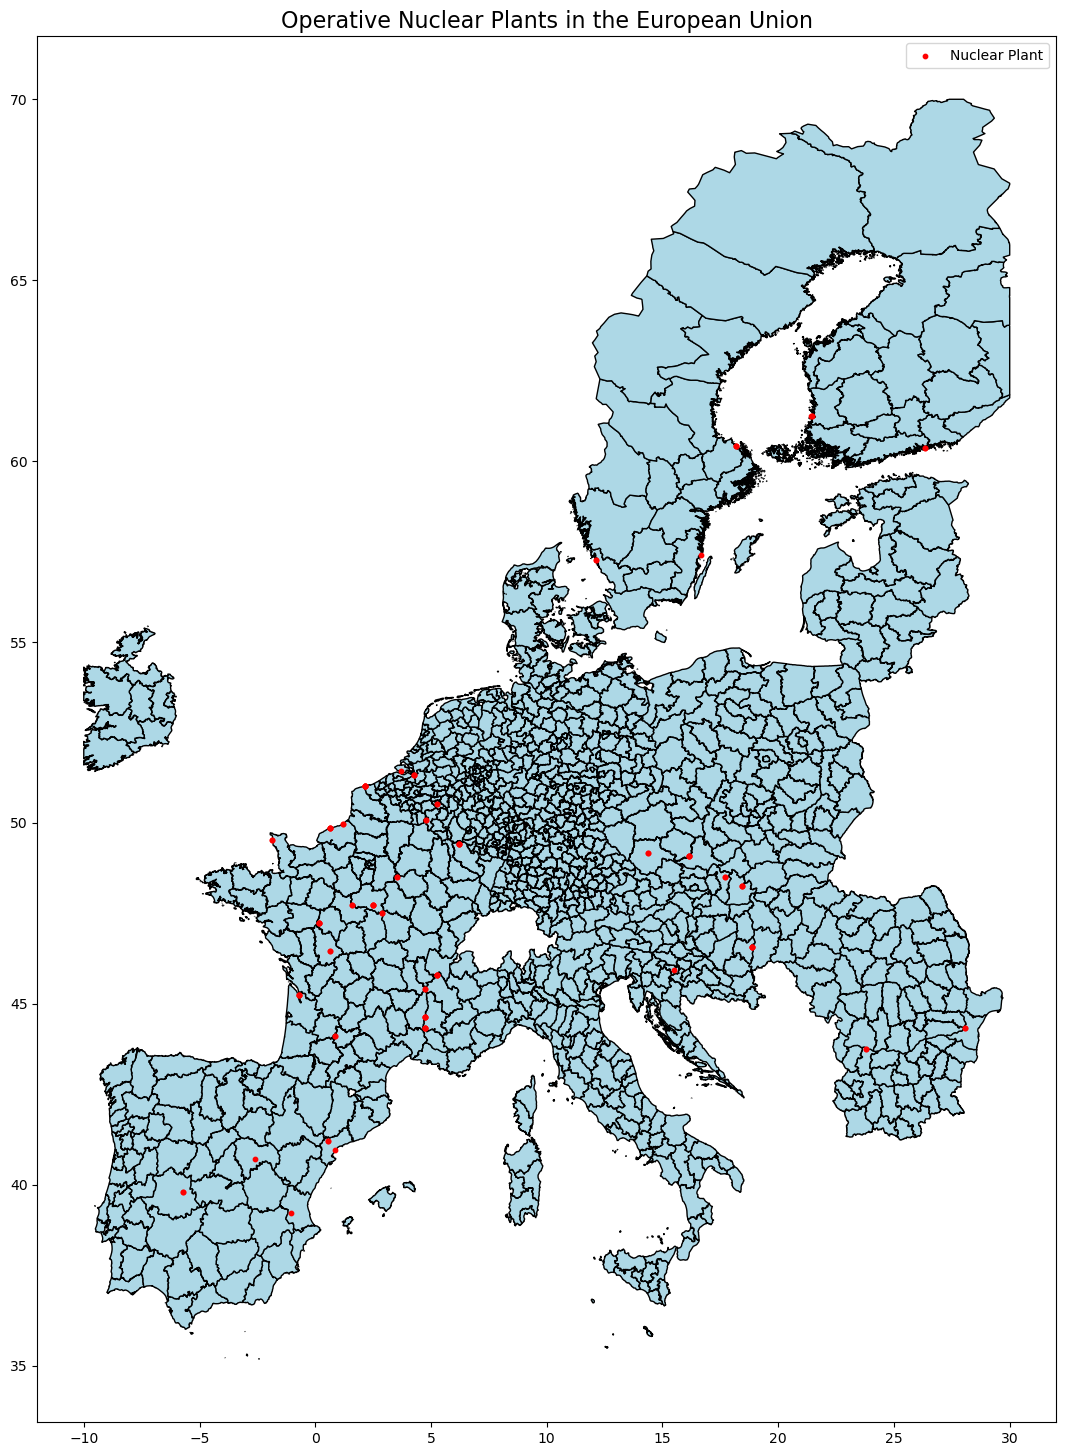

In [155]:
# Plot EU map with nuclear plants
fig, ax = plt.subplots(figsize=(18, 18))
eu_map.plot(ax=ax, color="lightblue", edgecolor="black")
plants_gdf.plot(ax=ax, color="red", markersize=10, label="Nuclear Plant")

# Add title and legend
ax.set_title("Operative Nuclear Plants in the European Union", fontsize=16)
ax.legend()

# Show the plot
plt.show()

In [156]:
# Load the file into a pandas DataFrame
gdp = pd.read_csv("estat_nama_10r_3gdp.tsv.gz", sep="\t", compression="gzip") # GDP per capita regional

# Display data
print(gdp)

       freq,unit,geo\TIME_PERIOD 2000  2001  2002  2003  2004  2005  2006   \
0                   A,EUR_HAB,AL    :     :     :     :     :     :     :    
1                  A,EUR_HAB,AL0    :     :     :     :     :     :     :    
2                 A,EUR_HAB,AL01    :     :     :     :     :     :     :    
3                A,EUR_HAB,AL011    :     :     :     :     :     :     :    
4                A,EUR_HAB,AL012    :     :     :     :     :     :     :    
...                          ...   ...   ...   ...   ...   ...   ...   ...   
12448   A,PPS_HAB_EU27_2020,TRC3    :     :     :     :    18    19    20    
12449  A,PPS_HAB_EU27_2020,TRC31    :     :     :     :    16    17    18    
12450  A,PPS_HAB_EU27_2020,TRC32    :     :     :     :    19    21    22    
12451  A,PPS_HAB_EU27_2020,TRC33    :     :     :     :    19    19    20    
12452  A,PPS_HAB_EU27_2020,TRC34    :     :     :     :    17    19    20    

      2007   2008   ...  2013    2014   2015   2016   2017   20

In [157]:
# Split the combined column into separate columns
gdp_split = gdp['freq,unit,geo\\TIME_PERIOD'].str.split(',', expand=True)

# Assign meaningful names to the new columns
gdp_split.columns = ['freq', 'unit', 'geo']

# Merge the split columns back into the original DataFrame
gdp = pd.concat([gdp, gdp_split], axis=1)

# Drop the original combined column (optional)
gdp.drop(columns=['freq,unit,geo\\TIME_PERIOD'], inplace=True)

In [158]:
print(gdp.columns.tolist())

['2000 ', '2001 ', '2002 ', '2003 ', '2004 ', '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ', 'freq', 'unit', 'geo']


In [159]:
# List of allowed countries
allowed_countries = [
    "AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR", "DE",
    "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL", "PL", "PT",
    "RO", "SK", "SI", "ES", "SE"
]

# Filter the dataset to include only rows where "geo" starts with an allowed prefix
gdp_filtered = gdp[gdp['geo'].str[:2].isin(allowed_countries)]

print(gdp_filtered)

        2000    2001    2002    2003    2004    2005    2006    2007    2008   \
17     26700   27400   28100   28600   29700   30900   32400   34200   35300    
18     28500   29300   29900   30200   31200   32100   33600   35300   36400    
19     17400   17900   18800   19300   20300   20500   21100   22400   22700    
20     15700   16500   16600   17900   18000   17900   19100   19700   19300    
21     19200   19600   20200   20700   22600   22800   23500   24700   25100    
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
12328     42      44      44      46      47      51      52      57      63    
12329     42      44      46      48      47      44      47      49      54    
12330     38      41      41      42      43      44      44      46      51    
12331     31      32      33      34      35      36      35      37      42    
12332     46      49      49      50      51      52      54      56      60    

        2009   ...   2016  

In [160]:
# Convert both columns to sets for comparison
nuts_ids = set(eu_map["NUTS_ID"].unique())
geo_codes = set(gdp_filtered["geo"].unique())

# Find common values
common_codes = nuts_ids.intersection(geo_codes)

# Find missing values
nuts_not_in_geo = nuts_ids.difference(geo_codes)  # In NUTS_ID but not in geo
geo_not_in_nuts = geo_codes.difference(nuts_ids)  # In geo but not in NUTS_ID

# Print results
print(f"Number of common codes: {len(common_codes)}")
print(f"Codes in NUTS_ID but not in geo: {nuts_not_in_geo}")
print(f"Codes in geo but not in NUTS_ID: {geo_not_in_nuts}")


Number of common codes: 1099
Codes in NUTS_ID but not in geo: set()
Codes in geo but not in NUTS_ID: {'ES43', 'HUZZZ', 'BE3', 'ESZZ', 'PL5', 'ES707', 'AT3', 'FRB', 'FRY10', 'BG32', 'ATZZ', 'DEB2', 'RO42', 'FR1', 'ES11', 'ES708', 'FR10', 'RO31', 'DEC', 'IE0', 'ITZ', 'DEG', 'DE12', 'SE11', 'FRJ2', 'BG42', 'PL41', 'DKZZ', 'DEE0', 'DEE', 'IE', 'RO1', 'FRL0', 'FRI', 'DE11', 'BEZZ', 'ES21', 'NL32', 'LU0', 'NL13', 'HU32', 'HR0', 'NL1', 'RO41', 'NL34', 'SE2', 'PL9', 'NL31', 'PL62', 'DE', 'PL91', 'NL22', 'HU23', 'CY0', 'BEZZZ', 'SK0', 'PT15', 'FRK1', 'DKZZZ', 'ITI3', 'SI04', 'FRC2', 'EE00', 'LV0', 'FRF2', 'BG41', 'PT18', 'SE12', 'ES5', 'HU22', 'FRH0', 'CZ03', 'ES706', 'DE6', 'LVZZ', 'PL42', 'AT32', 'BEZ', 'DE92', 'FRK', 'ES13', 'EE0', 'DEA', 'CZ', 'DE71', 'ITI2', 'FRF', 'DE21', 'SI', 'HU2', 'HU12', 'PL61', 'NL', 'DE80', 'NLZZ', 'BE22', 'FRZ', 'ES30', 'FRZZZ', 'DEF', 'BE24', 'AT34', 'ES51', 'PL4', 'DE23', 'AT31', 'DE9', 'ES2', 'AT2', 'FRY3', 'CZ06', 'FI', 'BE23', 'PT3', 'ROZ', 'DEA3', 'PT2', 'SE

In [161]:
# Step 1: Filter 'gdp' to keep only relevant rows
relevant_gdp = gdp[gdp['geo'].isin(eu_map['NUTS_ID'])]

# Step 2: Merge the filtered 'gdp' with 'eu_map'
merged = eu_map.merge(relevant_gdp, left_on="NUTS_ID", right_on="geo", how="left")

print(relevant_gdp)
print(merged)

#

        2000    2001    2002    2003    2004    2005    2006    2007    2008   \
20     15700   16500   16600   17900   18000   17900   19100   19700   19300    
21     19200   19600   20200   20700   22600   22800   23500   24700   25100    
22     15500   16200   17600   17800   17900   18200   18400   19900   20600    
24     20400   20900   20600   21200   22200   22800   24400   26200   27000    
25     19000   19600   20200   20700   21400   22300   23100   25000   25600    
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
12326     43      44      45      49      51      54      55      56      60    
12328     42      44      44      46      47      51      52      57      63    
12329     42      44      46      48      47      44      47      49      54    
12331     31      32      33      34      35      36      35      37      42    
12332     46      49      49      50      51      52      54      56      60    

        2009   ...   2016  

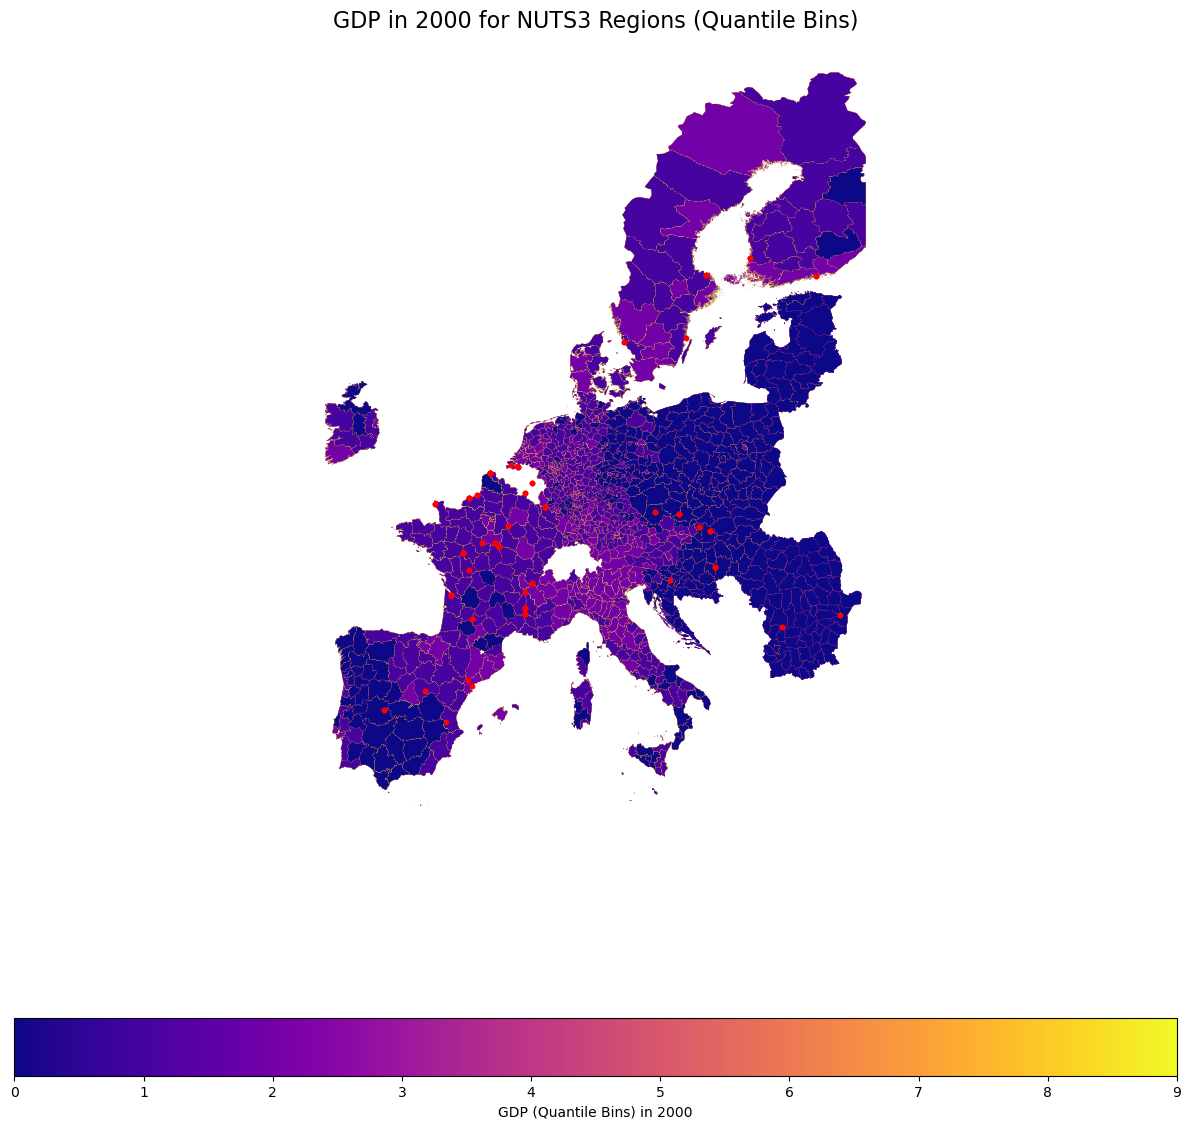

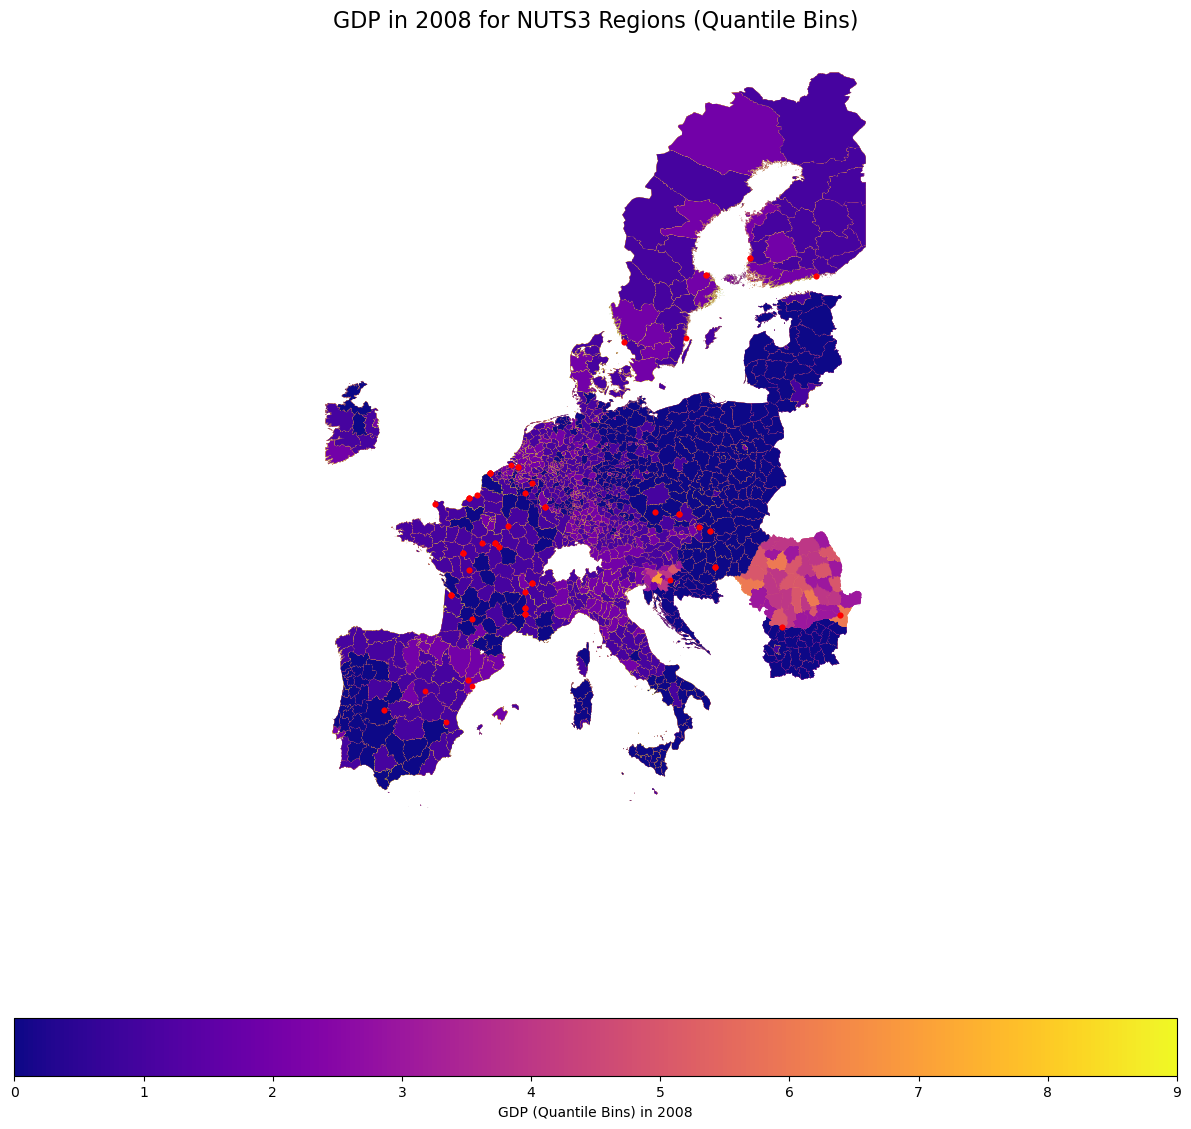

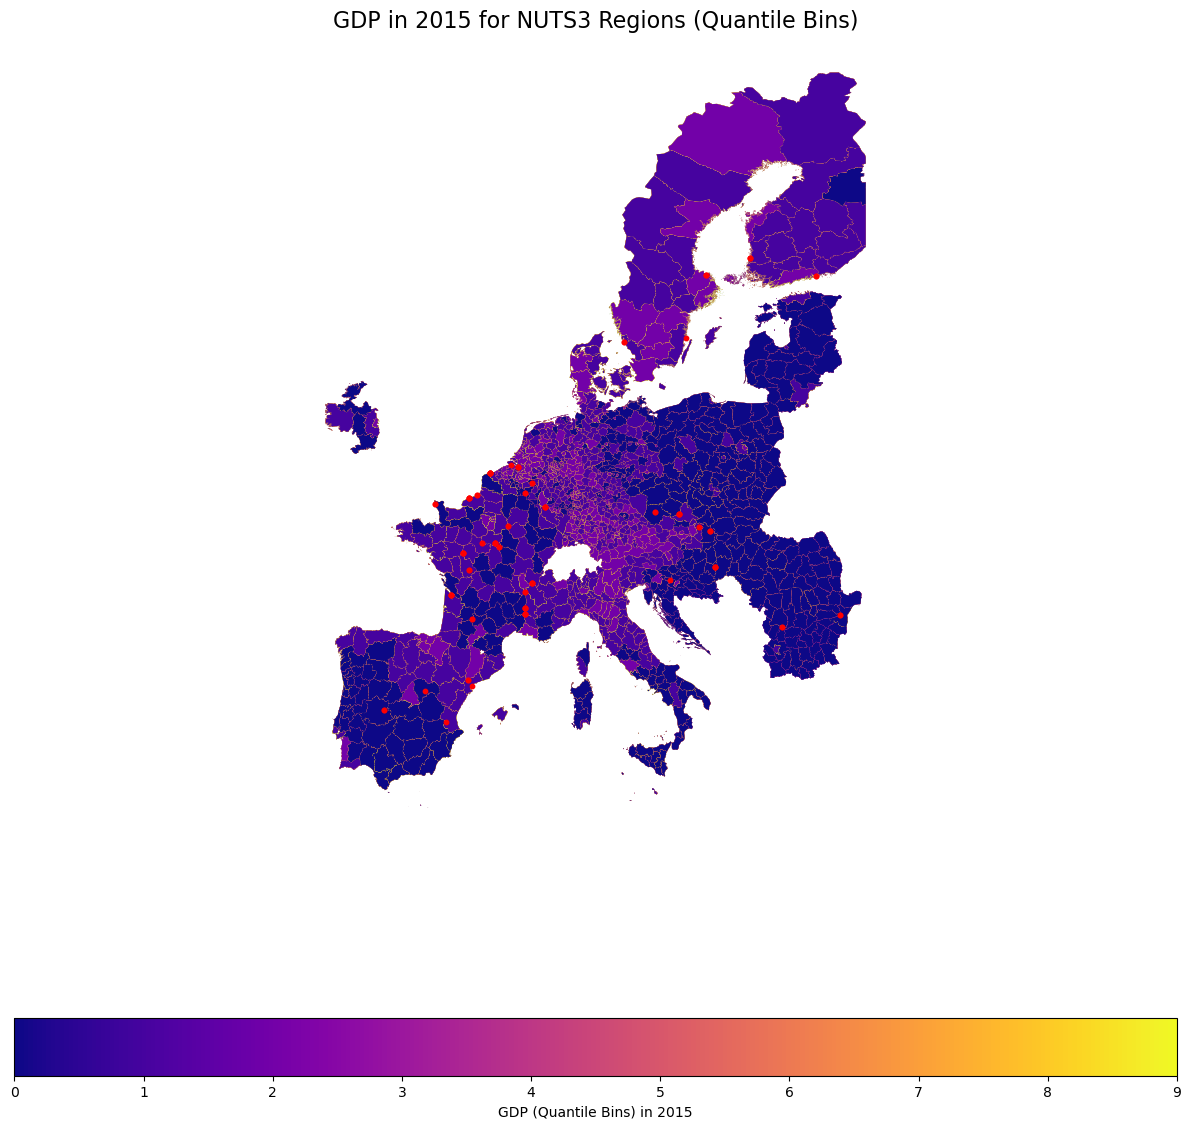

In [178]:
years = ["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",
        "2016", "2017", "2018","2019","2020","2021","2022",]  # List of year columns as strings

# Strip any leading or trailing whitespace from column names
merged.columns = merged.columns.str.strip()

# Loop through each year in the list and convert the column to numeric
years = [year for year in years if year in merged.columns]

for year in years:
    merged[year] = pd.to_numeric(merged[year], errors="coerce")

merged_long = pd.melt(
    merged,
    id_vars=["NUTS_ID", "geometry"],  # Keep these as identifiers
    value_vars=years,                # Only melt the year columns
    var_name="TIME_PERIOD",          # Column for years
    value_name="GDP"                 # Column for GDP values
)

years_of_interest = ["2000", "2008", "2015"]
merged_long = merged_long[merged_long["TIME_PERIOD"].isin(years_of_interest)]
merged_long = gpd.GeoDataFrame(merged_long, geometry="geometry")

# Plot for each year
for year in years_of_interest:
    year_data = merged_long[merged_long["TIME_PERIOD"] == year].copy()  # Use .copy() to avoid SettingWithCopyWarning
    year_data.loc[:, "TIME_PERIOD"] = pd.to_numeric(year_data["TIME_PERIOD"], errors="coerce")  # Explicit .loc
    year_data.loc[:, "Log_GDP"] = np.log1p(year_data["GDP"])  # Explicit .loc
    # Normalize GDP values to the range 0–1
    year_data["Scaled_GDP"] = (year_data["GDP"] - year_data["GDP"].min()) / (year_data["GDP"].max() - year_data["GDP"].min())
    # Add a new column with quantile bins
    year_data["GDP_Bins"] = pd.qcut(year_data["GDP"], q=10, labels=False)
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    year_data.plot(
    column="GDP_Bins",
    cmap="plasma",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": f"GDP (Quantile Bins) in {year}",
        "orientation": "horizontal"
    }
)
    plants_gdf.plot(ax=ax, color="red", markersize=10, label="Nuclear Plant")
    ax.set_title(f"GDP in {year} for NUTS3 Regions (Quantile Bins)", fontsize=16)
    ax.axis("off")
    plt.show()


In [184]:
print(merged)

     NUTS_ID  LEVL_CODE CNTR_CODE    NAME_LATN    NUTS_NAME  MOUNT_TYPE  \
0      BG425          3        BG    Kardzhali     ????????         3.0   
1      BG425          3        BG    Kardzhali     ????????         3.0   
2      BG425          3        BG    Kardzhali     ????????         3.0   
3      BG425          3        BG    Kardzhali     ????????         3.0   
4      BG425          3        BG    Kardzhali     ????????         3.0   
...      ...        ...       ...          ...          ...         ...   
7688   DK050          3        DK  Nordjylland  Nordjylland         4.0   
7689   DK050          3        DK  Nordjylland  Nordjylland         4.0   
7690   DK050          3        DK  Nordjylland  Nordjylland         4.0   
7691   DK050          3        DK  Nordjylland  Nordjylland         4.0   
7692   DK050          3        DK  Nordjylland  Nordjylland         4.0   

      URBN_TYPE  COAST_TYPE    FID  \
0           3.0           3  BG425   
1           3.0        

In [65]:
# Filter for Romania and year 2006
romania_gdp_2006 = merged_long[(merged_long["geo"].str.startswith("RO")) & (merged_long["TIME_PERIOD"] == "2006")]

# Display the filtered data
print(romania_gdp_2006[["geo", "TIME_PERIOD", "GDP"]])


Empty DataFrame
Columns: [geo, TIME_PERIOD, GDP]
Index: []


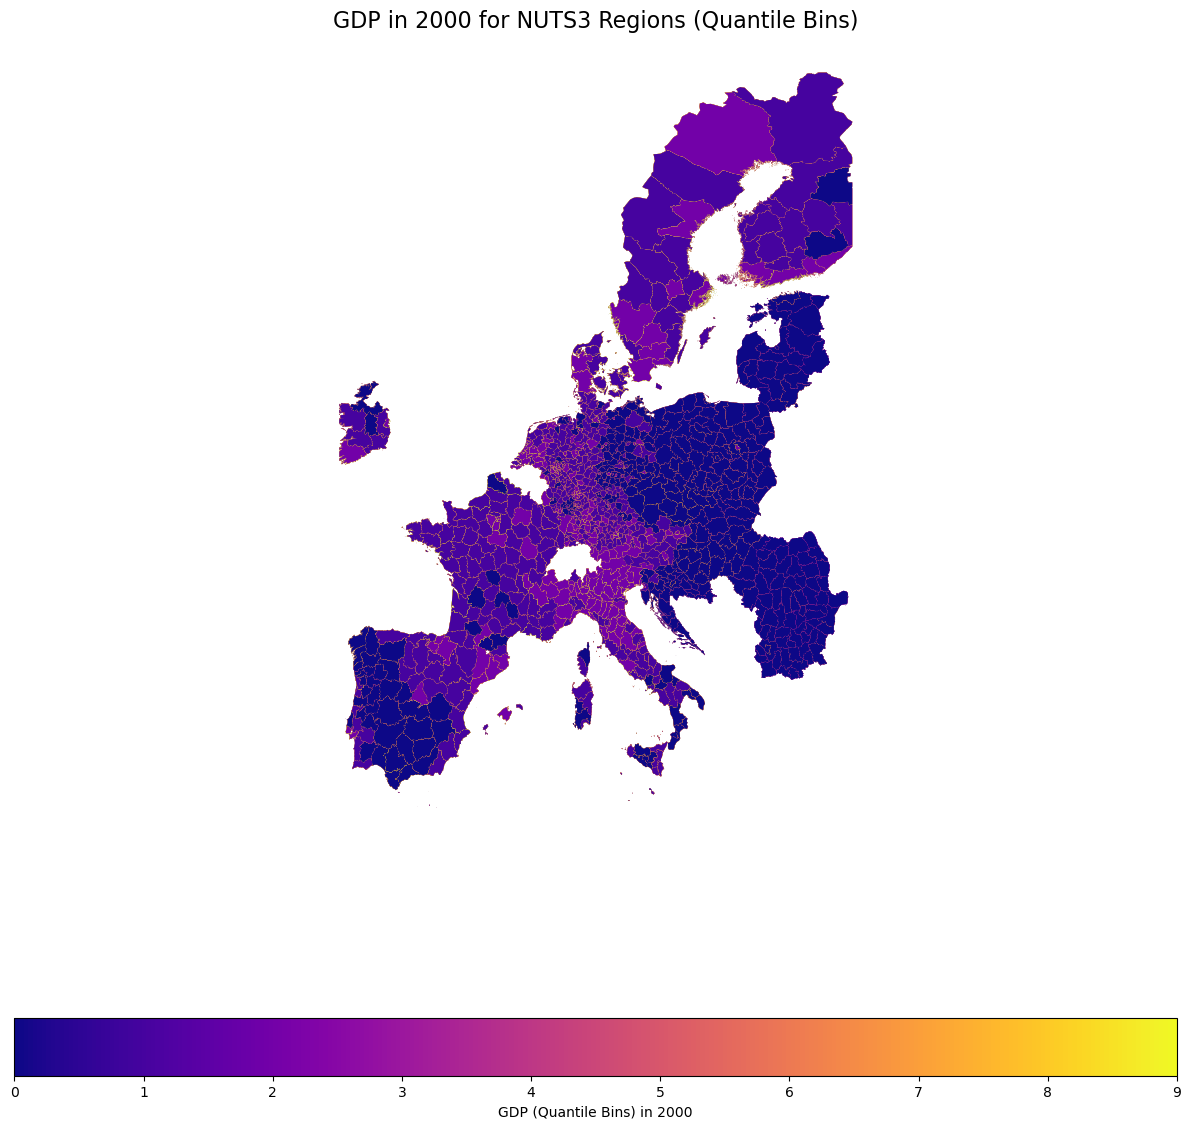

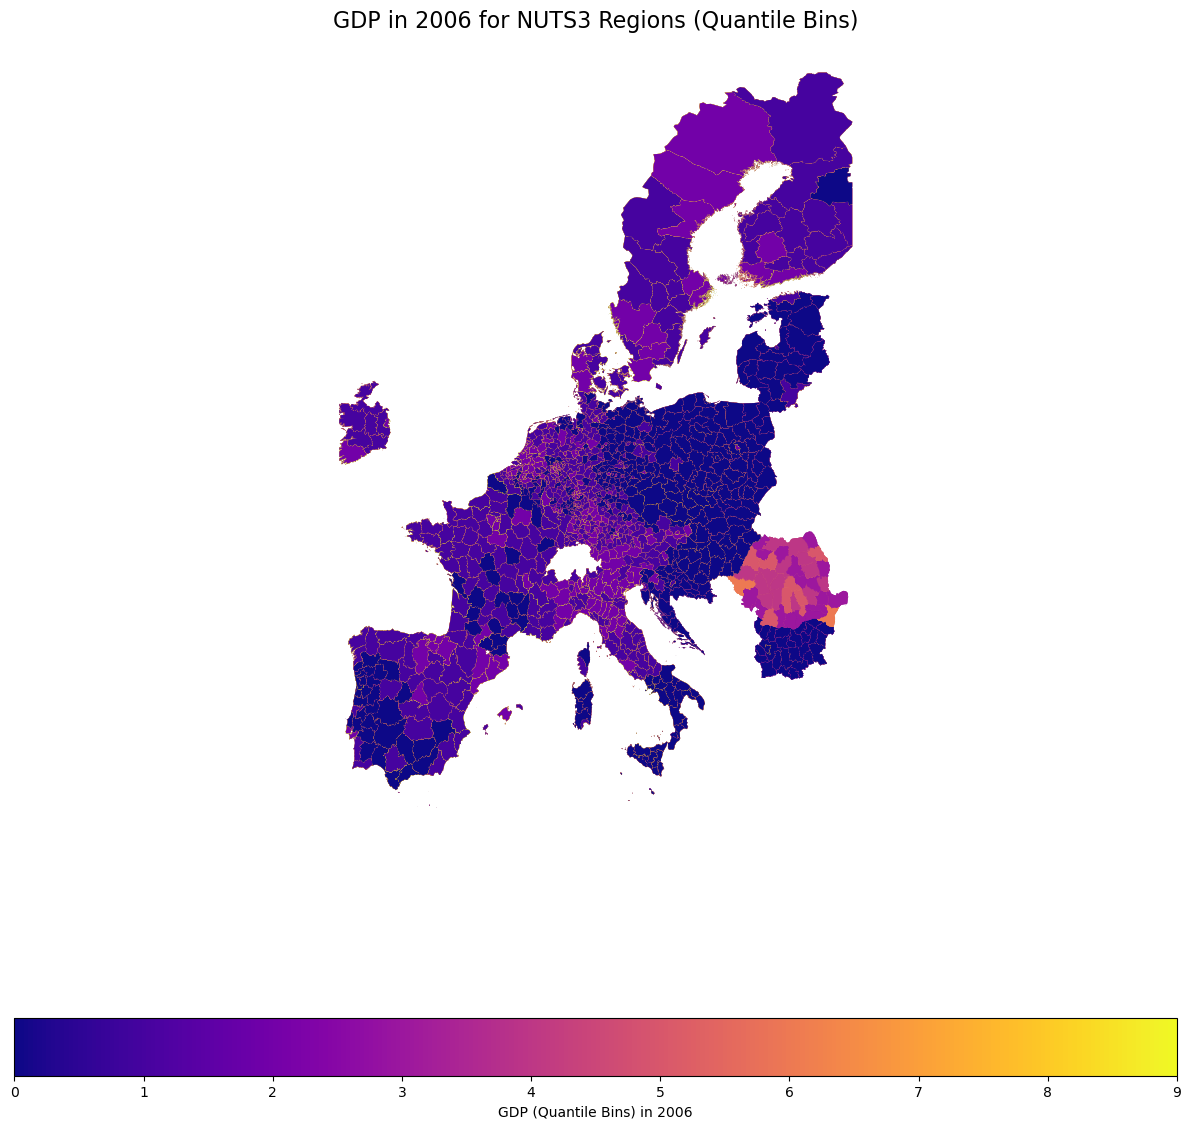

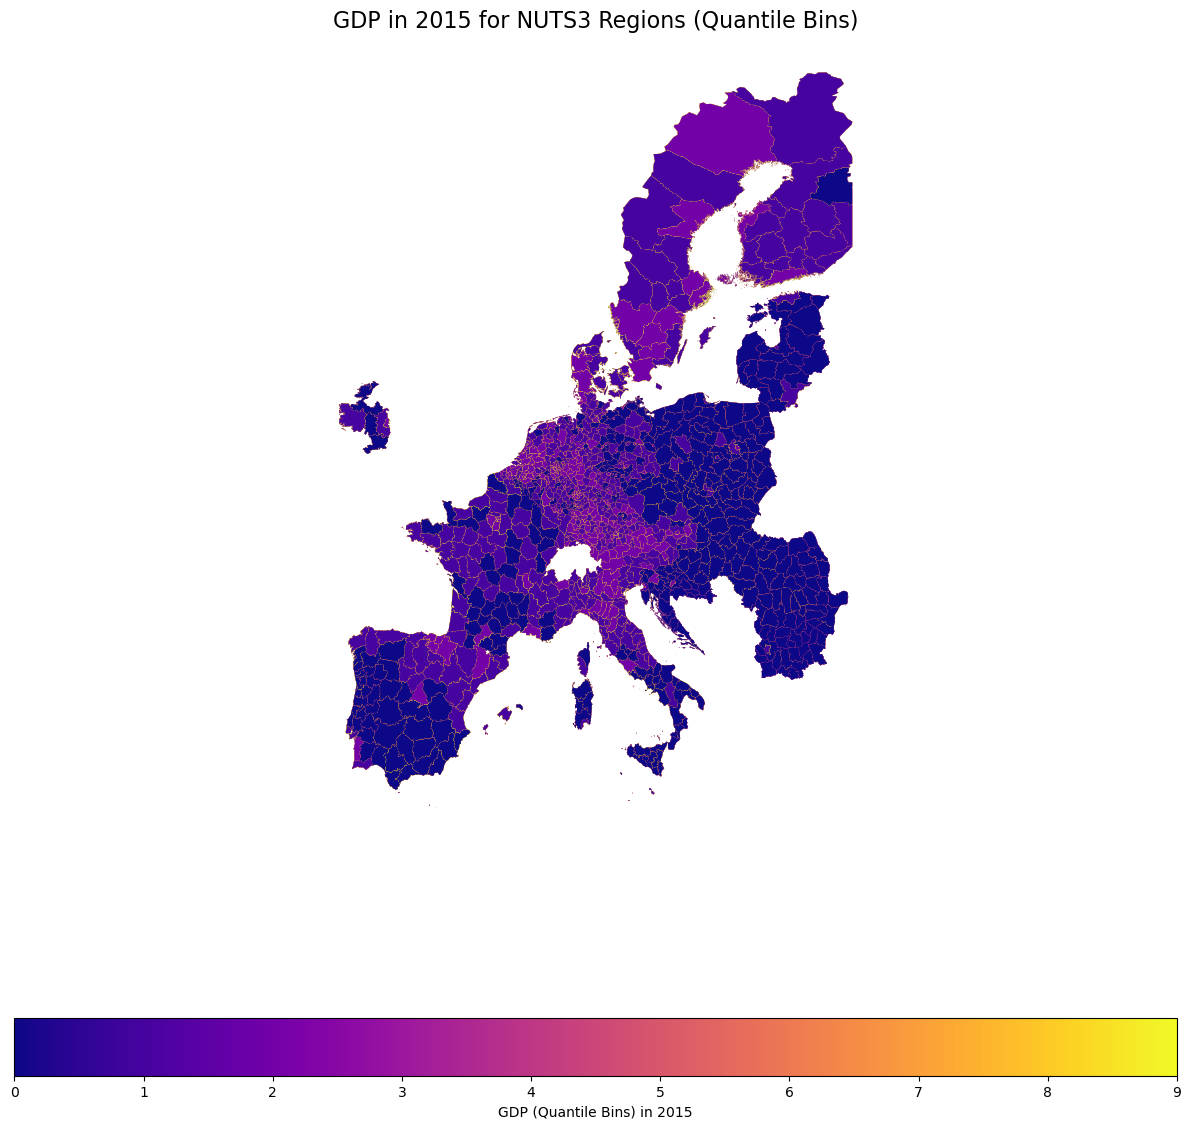

In [85]:
# Add a new column with quantile bins
year_data["GDP_Bins"] = pd.qcut(year_data["GDP"], q=10, labels=False)

# Plot using the binned data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
year_data.plot(
    column="GDP_Bins",
    cmap="plasma",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": f"GDP (Quantile Bins) in {year}",
        "orientation": "horizontal"
    }
)
ax.set_title(f"GDP in {year} for NUTS3 Regions (Quantile Bins)", fontsize=16)
ax.axis("off")
plt.show()

# Should we use quintiles? Here 

In [449]:
# Load the file into a pandas DataFrame
gdp = pd.read_csv("gdp.csv")
# Display data
print(gdp)

     STRUCTURE                                       STRUCTURE_ID  \
0     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
1     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
2     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
3     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
4     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
...        ...                                                ...   
7555  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7556  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7557  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7558  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7559  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   

                                         STRUCTURE_NAME ACTION FREQ  \
0     Annual GDP and consumption per capita, US $, c...      I    A   
1     Annual GDP and consumpt

In [451]:
# List of allowed countries
allowed_countries = [
    "AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "FIN", "FRA",
    "DEU", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT", "NLD",
    "POL", "PRT", "ROU", "SVK", "SVN", "ESP", "SWE"
]

# Filter the dataset to include only rows where "geo" starts with an allowed prefix
gdp_filtered = gdp[gdp['REF_AREA'].isin(allowed_countries)]

print(gdp_filtered)

     STRUCTURE                                       STRUCTURE_ID  \
0     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
1     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
2     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
3     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
4     DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
...        ...                                                ...   
7550  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7551  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7552  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7556  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   
7557  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...   

                                         STRUCTURE_NAME ACTION FREQ  \
0     Annual GDP and consumption per capita, US $, c...      I    A   
1     Annual GDP and consumpt

In [457]:
columns_to_drop = ["STRUCTURE" , "STRUCTURE_ID", "STRUCTURE_NAME" , "ACTION" , "FREQ" , "Frequency of observation" ,
                  "Confidentiality status" , "Transaction" , "TRANSACTION" , "Financial instruments and non-financial assets" ,
                  "CONF_STATUS" , "Confidentiality status" , "CURRENCY", "Currency"]
gdp_filtered.drop(columns=columns_to_drop, inplace=True)
print(gdp)
print(gdp.columns)

     REF_AREA Reference area SECTOR Institutional sector COUNTERPART_SECTOR  \
0         LVA         Latvia     S1        Total economy                 S1   
1         LVA         Latvia     S1        Total economy                 S1   
2         LVA         Latvia     S1        Total economy                 S1   
3         LVA         Latvia     S1        Total economy                 S1   
4         LVA         Latvia     S1        Total economy                 S1   
...       ...            ...    ...                  ...                ...   
7555    OECDE    OECD Europe     S1        Total economy                 S1   
7556      DNK        Denmark    S14           Households                 S1   
7557      DNK        Denmark     S1        Total economy                 S1   
7558      CHE    Switzerland    S14           Households                 S1   
7559      CMR       Cameroon     S1        Total economy                 S1   

     Counterpart institutional sector INSTR_ASSET A

C:\Users\user\AppData\Local\Temp\ipykernel_16048\2680085215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered.drop(columns=columns_to_drop, inplace=True)


In [459]:
merged = eu_map.merge(gdp_filtered, left_on="NUTS_ID", right_on="REF_AREA", how="left")

years = ["2000", "2001", "2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",
        "2016", "2017", "2018","2019","2020","2021","2022",]  # List of year columns as strings

# Strip any leading or trailing whitespace from column names
#merged.columns = merged.columns.str.strip()

# Loop through each year in the list and convert the column to numeric
years = [year for year in years if year in merged.columns]

for year in years:
    merged[year] = pd.to_numeric(merged[year], errors="coerce")
# THE DATASET IS ALREADY LONG
merged_long = pd.melt(
    merged,
    id_vars=["REF_AREA", "geometry"],  # Keep these as identifiers
    value_vars=years,                # Only melt the year columns
    var_name="TIME_PERIOD",          # Column for years
    value_name="OBS_VALUE"                 # Column for GDP values
)

years_of_interest = ["2000", "2008", "2015"]
merged_long = merged_long[merged_long["TIME_PERIOD"].isin(years_of_interest)]
merged_long = gpd.GeoDataFrame(merged_long, geometry="geometry")

# Plot for each year
for year in years_of_interest:
    year_data = merged_long[merged_long["TIME_PERIOD"] == year].copy()  # Use .copy() to avoid SettingWithCopyWarning
    year_data.loc[:, "TIME_PERIOD"] = pd.to_numeric(year_data["TIME_PERIOD"], errors="coerce")  # Explicit .loc
    year_data["OBS_VALUE"] = pd.qcut(year_data["GDP"], q=10, labels=False)
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    year_data.plot(
    column="obs_value",
    cmap="plasma",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": f"GDP (Quantile Bins) in {year}",
        "orientation": "horizontal"
    }
)
    ax.set_title(f"GDP in {year} for NUTS3 Regions (Quantile Bins)", fontsize=16)
    ax.axis("off")
    plt.show()


ValueError: value_name (OBS_VALUE) cannot match an element in the DataFrame columns.